In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

In [16]:
kcal_df = pd.read_csv('data/data_clean/kcal_data_clean.csv')

# Removing the following columns
kcal_df = kcal_df.drop(['Country', 'Obesity', 'Undernourished', 'Active', 'Population'], axis=1)

In [17]:
# Separating X and scaling X due to data distribution
X = kcal_df.drop(['Confirmed','Deaths', 'Recovered'], axis=1)
# X = MinMaxScaler().fit_transform(X)

### Confirmed Attribute

In [43]:
y = kcal_df['Confirmed']
y.describe()

count    164.000000
mean       2.021972
std        2.360454
min        0.000312
25%        0.140976
50%        1.011570
75%        3.487069
max       10.408199
Name: Confirmed, dtype: float64

##### Hyper-parameter tuning SVR model

In [21]:
# Splitting using K-Fold for cross_val
kfold = KFold(n_splits=10)

# SVR Parameter Grid
param_grid = {'C': [0.1,1, 10, 100], 
              'gamma': [1,0.1,0.01,0.001]
             }

# Create SVR model instance (linear is chosen for coefficient)
svr = SVR(kernel='linear')

# Create GridSearchCV instance
svr_gs = GridSearchCV(svr, param_grid, refit=True)
svr_gs.fit(X, y)

# Metrics and Cross Validation of model
mse = cross_val_score(svr_gs, X, y, scoring='neg_mean_squared_error', cv=kfold)
rmse = cross_val_score(svr_gs, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
mae = cross_val_score(svr_gs, X, y, scoring='neg_mean_absolute_error', cv=kfold)

#Output best estimator
print(svr_gs.best_estimator_)

# Output of all Cross Validation scores
print(f"MSE: {-mse.mean()} ({mse.std()})")
print(f"RMSE: {-rmse.mean()} ({rmse.std()})")
print(f"MAE: {-mae.mean()} ({mae.std()})")

SVR(C=10, gamma=1, kernel='linear')
MSE: 3.3155473431979567 (1.37510825052997)
RMSE: 1.7897369575337616 (0.33524463610287736)
MAE: 1.2993796785617906 (0.19336826175778674)


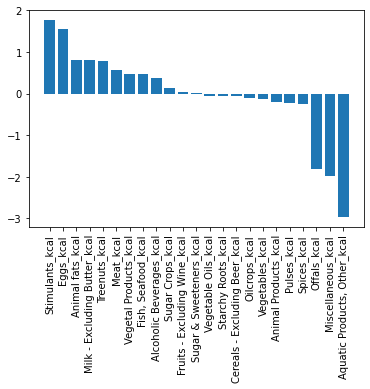

In [26]:
# Identifying the most influential features via model coefficients
importance = svr_gs.best_estimator_.coef_.ravel()

# Plotting Feature Coefficients
feat_importance = zip(kcal_df.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)
feat_importance

plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()

##### Hyper-parameter tuning RandomForest model

In [20]:
# Splitting using K-Fold for cross_val
kfold = KFold(n_splits=10)

# RandomForest Parameter Grid
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create RandomForest Regressor model instance
rf = RandomForestRegressor()

# Create GridSearchCV instance
rf_gs = GridSearchCV(rf, param_grid, refit=True)
rf_gs.fit(X, y)

# Metrics and Cross Validation of model
mse = cross_val_score(rf_gs, X, y, scoring='neg_mean_squared_error', cv=kfold)
rmse = cross_val_score(rf_gs, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
mae = cross_val_score(rf_gs, X, y, scoring='neg_mean_absolute_error', cv=kfold)

#Output best estimator
print(rf_gs.best_estimator_)

# Output of all Cross Validation scores
print(f"MSE: {-mse.mean()} ({mse.std()})")
print(f"RMSE: {-rmse.mean()} ({rmse.std()})")
print(f"MAE: {-mae.mean()} ({mae.std()})")

RandomForestRegressor(max_depth=90, max_features=3, min_samples_leaf=4,
                      min_samples_split=12)
MSE: 3.0769851738331626 (1.325477108681583)
RMSE: 1.712679776345005 (0.3225473210573853)
MAE: 1.1995245444310598 (0.19811425997425594)


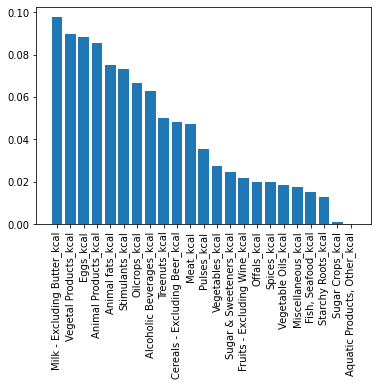

In [28]:
# Get Feature Importance from model
importance = rf_gs.best_estimator_.feature_importances_


# Plot Feature importance
feat_importance = zip(kcal_df.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)

plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()

### Deaths Attribute

In [45]:
X_d = StandardScaler().fit_transform(X)
y = kcal_df['Deaths']*10
y.describe()

count    164.000000
mean       0.393696
std        0.487184
min        0.000000
25%        0.020131
50%        0.119981
75%        0.695028
max        1.854277
Name: Deaths, dtype: float64

##### Hyper-parameter tuning SVR model

In [39]:
# Splitting using K-Fold for cross_val
kfold = KFold(n_splits=10)

# SVR Parameter Grid
param_grid = {'C': [0.1,1, 10, 100], 
              'gamma': [1,0.1,0.01,0.001]
             }

# Create SVR model instance (linear is chosen for coefficient)
svr = SVR(kernel='linear')

# Create GridSearchCV instance
svr_gs = GridSearchCV(svr, param_grid, refit=True)
svr_gs.fit(X_d, y)

# Metrics and Cross Validation of model
mse = cross_val_score(svr_gs, X_d, y, scoring='neg_mean_squared_error', cv=kfold)
rmse = cross_val_score(svr_gs, X_d, y, scoring='neg_root_mean_squared_error', cv=kfold)
mae = cross_val_score(svr_gs, X_d, y, scoring='neg_mean_absolute_error', cv=kfold)

#Output best estimator
print(svr_gs.best_estimator_)

# Output of all Cross Validation scores
print(f"MSE: {-mse.mean()} ({mse.std()})")
print(f"RMSE: {-rmse.mean()} ({rmse.std()})")
print(f"MAE: {-mae.mean()} ({mae.std()})")

SVR(C=0.1, gamma=1, kernel='linear')
MSE: 0.1416920786523389 (0.05876780092261908)
RMSE: 0.36831680478314005 (0.07768403933033596)
MAE: 0.269665653371736 (0.0573642955568686)


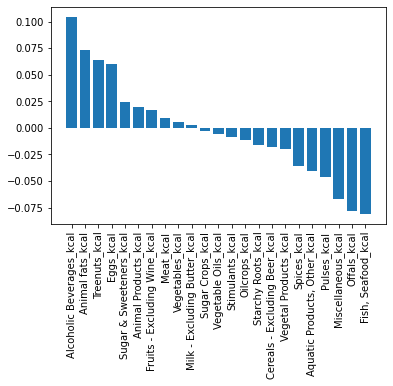

In [41]:
# Identifying the most influential features via model coefficients
importance = svr_gs.best_estimator_.coef_.ravel()

# Plotting Feature Coefficients
feat_importance = zip(kcal_df.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)
feat_importance

plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()

##### Hyper-parameter tuning RandomForest model

In [46]:
# Splitting using K-Fold for cross_val
kfold = KFold(n_splits=10)

# RandomForest Parameter Grid
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create RandomForest Regressor model instance
rf = RandomForestRegressor()

# Create GridSearchCV instance
rf_gs = GridSearchCV(rf, param_grid, refit=True)
rf_gs.fit(X, y)

# Metrics and Cross Validation of model
mse = cross_val_score(rf_gs, X, y, scoring='neg_mean_squared_error', cv=kfold)
rmse = cross_val_score(rf_gs, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
mae = cross_val_score(rf_gs, X, y, scoring='neg_mean_absolute_error', cv=kfold)

#Output best estimator
print(rf_gs.best_estimator_)

# Output of all Cross Validation scores
print(f"MSE: {-mse.mean()} ({mse.std()})")
print(f"RMSE: {-rmse.mean()} ({rmse.std()})")
print(f"MAE: {-mae.mean()} ({mae.std()})")

RandomForestRegressor(max_depth=110, max_features=3, min_samples_leaf=4,
                      min_samples_split=8)
MSE: 0.1363727582425938 (0.04562951980923473)
RMSE: 0.3658646282540543 (0.06375607553737506)
MAE: 0.27254396374245743 (0.03651051773574174)


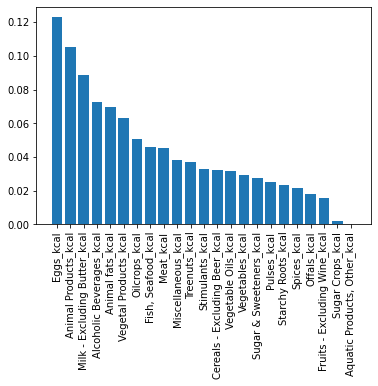

In [47]:
# Get Feature Importance from model
importance = rf_gs.best_estimator_.feature_importances_


# Plot Feature importance
feat_importance = zip(kcal_df.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)

plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()

### Recovered Attribute

In [48]:
y = kcal_df['Recovered']

##### Hyper-parameter tuning SVR model

In [49]:
# Splitting using K-Fold for cross_val
kfold = KFold(n_splits=10)

# SVR Parameter Grid
param_grid = {'C': [0.1,1, 10, 100], 
              'gamma': [1,0.1,0.01,0.001]
             }

# Create SVR model instance (linear is chosen for coefficient)
svr = SVR(kernel='linear')

# Create GridSearchCV instance
svr_gs = GridSearchCV(svr, param_grid, refit=True)
svr_gs.fit(X, y)

# Metrics and Cross Validation of model
mse = cross_val_score(svr_gs, X, y, scoring='neg_mean_squared_error', cv=kfold)
rmse = cross_val_score(svr_gs, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
mae = cross_val_score(svr_gs, X, y, scoring='neg_mean_absolute_error', cv=kfold)

#Output best estimator
print(svr_gs.best_estimator_)

# Output of all Cross Validation scores
print(f"MSE: {-mse.mean()} ({mse.std()})")
print(f"RMSE: {-rmse.mean()} ({rmse.std()})")
print(f"MAE: {-mae.mean()} ({mae.std()})")

SVR(C=10, gamma=1, kernel='linear')
MSE: 2.849445677843421 (1.3863818099012877)
RMSE: 1.645907063182501 (0.37474740453987865)
MAE: 1.086521706238033 (0.23061914811350792)


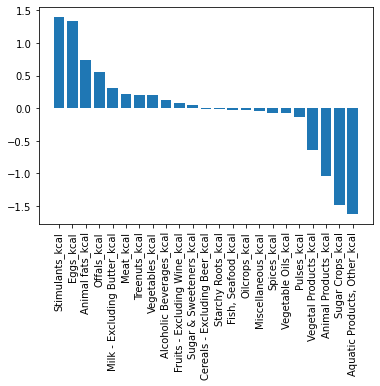

In [50]:
# Identifying the most influential features via model coefficients
importance = svr_gs.best_estimator_.coef_.ravel()

# Plotting Feature Coefficients
feat_importance = zip(kcal_df.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)
feat_importance

plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()

##### Hyper-parameter tuning RandomForest model

In [51]:
# Splitting using K-Fold for cross_val
kfold = KFold(n_splits=10)

# RandomForest Parameter Grid
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create RandomForest Regressor model instance
rf = RandomForestRegressor()

# Create GridSearchCV instance
rf_gs = GridSearchCV(rf, param_grid, refit=True)
rf_gs.fit(X, y)

# Metrics and Cross Validation of model
mse = cross_val_score(rf_gs, X, y, scoring='neg_mean_squared_error', cv=kfold)
rmse = cross_val_score(rf_gs, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
mae = cross_val_score(rf_gs, X, y, scoring='neg_mean_absolute_error', cv=kfold)

#Output best estimator
print(rf_gs.best_estimator_)

# Output of all Cross Validation scores
print(f"MSE: {-mse.mean()} ({mse.std()})")
print(f"RMSE: {-rmse.mean()} ({rmse.std()})")
print(f"MAE: {-mae.mean()} ({mae.std()})")

RandomForestRegressor(max_depth=110, max_features=3, min_samples_leaf=3,
                      min_samples_split=10)
MSE: 2.6359626232631763 (1.2901853272733828)
RMSE: 1.5993965492200197 (0.385843967734889)
MAE: 1.1087692318174815 (0.23769137516807434)


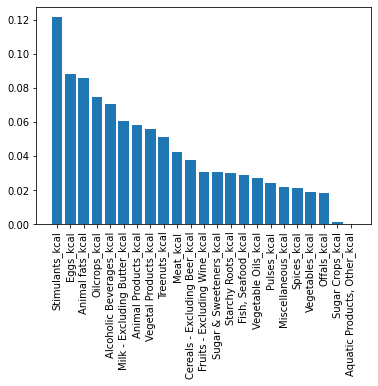

In [52]:
# Get Feature Importance from model
importance = rf_gs.best_estimator_.feature_importances_


# Plot Feature importance
feat_importance = zip(kcal_df.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)

plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()

# Scaling features for score comparison with non-scaled features

In [58]:
X = kcal_df.drop(['Confirmed','Deaths', 'Recovered'], axis=1)
X = StandardScaler().fit_transform(X)

### Confirmed Attribute

In [59]:
y = kcal_df['Confirmed']
y.describe()

count    164.000000
mean       2.021972
std        2.360454
min        0.000312
25%        0.140976
50%        1.011570
75%        3.487069
max       10.408199
Name: Confirmed, dtype: float64

##### Hyper-parameter tuning SVR model

In [60]:
# Splitting using K-Fold for cross_val
kfold = KFold(n_splits=10)

# SVR Parameter Grid
param_grid = {'C': [0.1,1, 10, 100], 
              'gamma': [1,0.1,0.01,0.001]
             }

# Create SVR model instance (linear is chosen for coefficient)
svr = SVR(C=10, gamma=1, kernel='linear')

# Create GridSearchCV instance
# svr_gs = GridSearchCV(svr, param_grid, refit=True)
# svr_gs.fit(X, y)

# Metrics and Cross Validation of model
mse = cross_val_score(svr, X, y, scoring='neg_mean_squared_error', cv=kfold)
rmse = cross_val_score(svr, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
mae = cross_val_score(svr, X, y, scoring='neg_mean_absolute_error', cv=kfold)

#Output best estimator
# print(svr_gs.best_estimator_)

# Output of all Cross Validation scores
print(f"MSE: {-mse.mean()} ({mse.std()})")
print(f"RMSE: {-rmse.mean()} ({rmse.std()})")
print(f"MAE: {-mae.mean()} ({mae.std()})")

MSE: 3.1908345377634175 (0.8582124248127144)
RMSE: 1.769384325664903 (0.2451808431643363)
MAE: 1.3270782968609325 (0.1693767843321092)


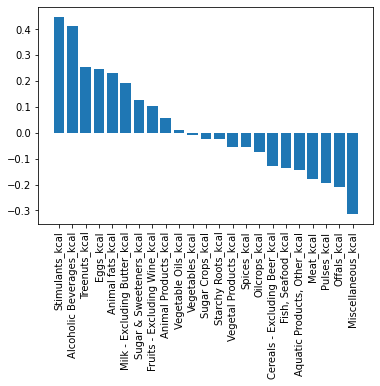

In [61]:
# Identifying the most influential features via model coefficients
importance = svr_gs.best_estimator_.coef_.ravel()

# Plotting Feature Coefficients
feat_importance = zip(kcal_df.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)
feat_importance

plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()

##### Hyper-parameter tuning RandomForest model

In [62]:
# Splitting using K-Fold for cross_val
kfold = KFold(n_splits=10)

# RandomForest Parameter Grid
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create RandomForest Regressor model instance
rf = RandomForestRegressor(max_depth=110, max_features=3, 
                           min_samples_leaf=4, min_samples_split=8)

# Create GridSearchCV instance
# rf_gs = GridSearchCV(rf, param_grid, refit=True)
# rf_gs.fit(X, y)

# Metrics and Cross Validation of model
mse = cross_val_score(rf, X, y, scoring='neg_mean_squared_error', cv=kfold)
rmse = cross_val_score(rf, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
mae = cross_val_score(rf, X, y, scoring='neg_mean_absolute_error', cv=kfold)

#Output best estimator
# print(rf_gs.best_estimator_)

# Output of all Cross Validation scores
print(f"MSE: {-mse.mean()} ({mse.std()})")
print(f"RMSE: {-rmse.mean()} ({rmse.std()})")
print(f"MAE: {-mae.mean()} ({mae.std()})")

MSE: 3.053124222538812 (1.3450783078527762)
RMSE: 1.7104945499844146 (0.35137186293542166)
MAE: 1.2347626553638 (0.19041399391844568)


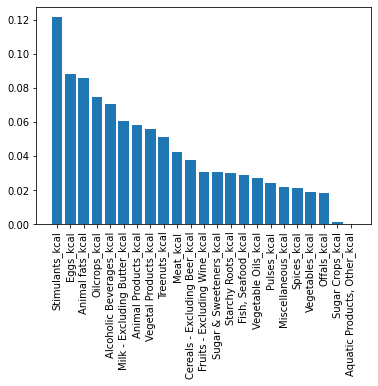

In [63]:
# Get Feature Importance from model
importance = rf_gs.best_estimator_.feature_importances_


# Plot Feature importance
feat_importance = zip(kcal_df.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)

plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()

### Deaths Attribute

In [64]:
X_d = StandardScaler().fit_transform(X)
y = kcal_df['Deaths']*10
y.describe()

count    164.000000
mean       0.393696
std        0.487184
min        0.000000
25%        0.020131
50%        0.119981
75%        0.695028
max        1.854277
Name: Deaths, dtype: float64

##### Hyper-parameter tuning SVR model

In [65]:
# Splitting using K-Fold for cross_val
kfold = KFold(n_splits=10)

# SVR Parameter Grid
param_grid = {'C': [0.1,1, 10, 100], 
              'gamma': [1,0.1,0.01,0.001]
             }

# Create SVR model instance (linear is chosen for coefficient)
svr = SVR(C=10, gamma=1, kernel='linear')

# Create GridSearchCV instance
# svr_gs = GridSearchCV(svr, param_grid, refit=True)
# svr_gs.fit(X, y)

# Metrics and Cross Validation of model
mse = cross_val_score(svr, X, y, scoring='neg_mean_squared_error', cv=kfold)
rmse = cross_val_score(svr, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
mae = cross_val_score(svr, X, y, scoring='neg_mean_absolute_error', cv=kfold)

#Output best estimator
# print(svr_gs.best_estimator_)

# Output of all Cross Validation scores
print(f"MSE: {-mse.mean()} ({mse.std()})")
print(f"RMSE: {-rmse.mean()} ({rmse.std()})")
print(f"MAE: {-mae.mean()} ({mae.std()})")

MSE: 0.1440223465997678 (0.05756404025031141)
RMSE: 0.3719816837727901 (0.07517960852071386)
MAE: 0.27352287608726883 (0.053290500056066954)


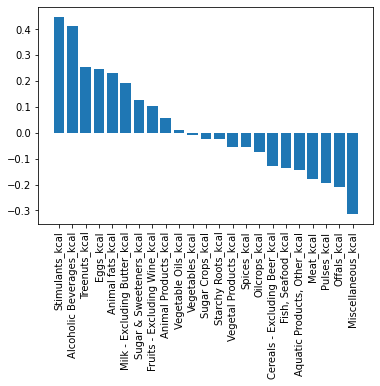

In [66]:
# Identifying the most influential features via model coefficients
importance = svr_gs.best_estimator_.coef_.ravel()

# Plotting Feature Coefficients
feat_importance = zip(kcal_df.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)
feat_importance

plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()

##### Hyper-parameter tuning RandomForest model

In [67]:
# Splitting using K-Fold for cross_val
kfold = KFold(n_splits=10)

# RandomForest Parameter Grid
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create RandomForest Regressor model instance
rf = RandomForestRegressor(max_depth=110, max_features=3, 
                           min_samples_leaf=4, min_samples_split=8)

# Create GridSearchCV instance
# rf_gs = GridSearchCV(rf, param_grid, refit=True)
# rf_gs.fit(X, y)

# Metrics and Cross Validation of model
mse = cross_val_score(rf, X, y, scoring='neg_mean_squared_error', cv=kfold)
rmse = cross_val_score(rf, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
mae = cross_val_score(rf, X, y, scoring='neg_mean_absolute_error', cv=kfold)

#Output best estimator
# print(rf_gs.best_estimator_)

# Output of all Cross Validation scores
print(f"MSE: {-mse.mean()} ({mse.std()})")
print(f"RMSE: {-rmse.mean()} ({rmse.std()})")
print(f"MAE: {-mae.mean()} ({mae.std()})")

MSE: 0.14018505544746013 (0.04668374241357306)
RMSE: 0.36549164363828096 (0.06270630660342058)
MAE: 0.27557430918862785 (0.038163624513149995)


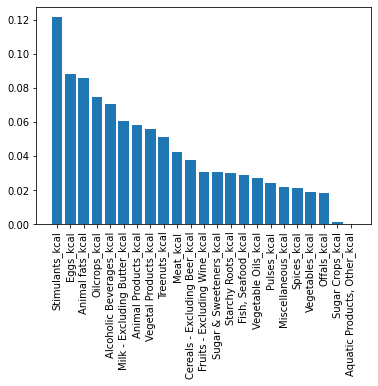

In [68]:
# Get Feature Importance from model
importance = rf_gs.best_estimator_.feature_importances_


# Plot Feature importance
feat_importance = zip(kcal_df.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)

plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()

### Recovered Attribute

In [69]:
y = kcal_df['Recovered']

##### Hyper-parameter tuning SVR model

In [70]:
# Splitting using K-Fold for cross_val
kfold = KFold(n_splits=10)

# SVR Parameter Grid
param_grid = {'C': [0.1,1, 10, 100], 
              'gamma': [1,0.1,0.01,0.001]
             }

# Create SVR model instance (linear is chosen for coefficient)
svr = SVR(C=10, gamma=1, kernel='linear')

# Create GridSearchCV instance
# svr_gs = GridSearchCV(svr, param_grid, refit=True)
# svr_gs.fit(X, y)

# Metrics and Cross Validation of model
mse = cross_val_score(svr, X, y, scoring='neg_mean_squared_error', cv=kfold)
rmse = cross_val_score(svr, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
mae = cross_val_score(svr, X, y, scoring='neg_mean_absolute_error', cv=kfold)

#Output best estimator
# print(svr_gs.best_estimator_)

# Output of all Cross Validation scores
print(f"MSE: {-mse.mean()} ({mse.std()})")
print(f"RMSE: {-rmse.mean()} ({rmse.std()})")
print(f"MAE: {-mae.mean()} ({mae.std()})")

MSE: 2.8073817263146186 (1.2975815538129043)
RMSE: 1.635334845077614 (0.36477619273959677)
MAE: 1.101154530051799 (0.22433194522317498)


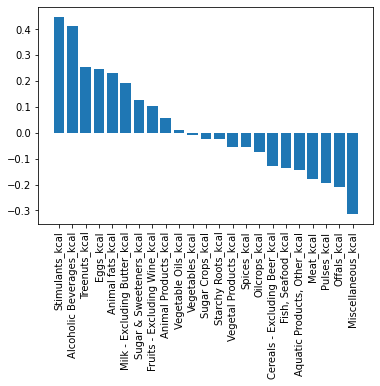

In [71]:
# Identifying the most influential features via model coefficients
importance = svr_gs.best_estimator_.coef_.ravel()

# Plotting Feature Coefficients
feat_importance = zip(kcal_df.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)
feat_importance

plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()

##### Hyper-parameter tuning RandomForest model

In [72]:
# Splitting using K-Fold for cross_val
kfold = KFold(n_splits=10)

# RandomForest Parameter Grid
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create RandomForest Regressor model instance
rf = RandomForestRegressor(max_depth=110, max_features=3, 
                           min_samples_leaf=4, min_samples_split=8)

# Create GridSearchCV instance
# rf_gs = GridSearchCV(rf, param_grid, refit=True)
# rf_gs.fit(X, y)

# Metrics and Cross Validation of model
mse = cross_val_score(rf, X, y, scoring='neg_mean_squared_error', cv=kfold)
rmse = cross_val_score(rf, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
mae = cross_val_score(rf, X, y, scoring='neg_mean_absolute_error', cv=kfold)

#Output best estimator
# print(rf_gs.best_estimator_)

# Output of all Cross Validation scores
print(f"MSE: {-mse.mean()} ({mse.std()})")
print(f"RMSE: {-rmse.mean()} ({rmse.std()})")
print(f"MAE: {-mae.mean()} ({mae.std()})")

MSE: 2.6731120800295445 (1.3299961387446546)
RMSE: 1.5966376861103535 (0.374545503270481)
MAE: 1.115991623334314 (0.22190847548995649)


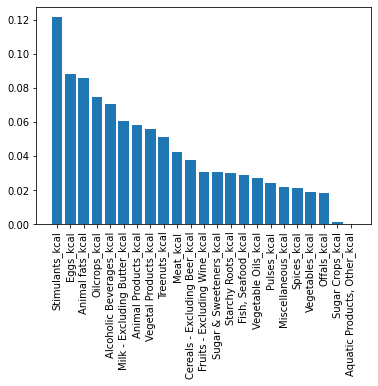

In [73]:
# Get Feature Importance from model
importance = rf_gs.best_estimator_.feature_importances_


# Plot Feature importance
feat_importance = zip(kcal_df.columns, importance)
feat_importance = sorted([x for x in feat_importance], key = lambda x: x[1], reverse=True)

plt.bar(*zip(*feat_importance))
plt.xticks(rotation=90)
plt.show()